In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC , LinearSVC
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingClassifier

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# read data

In [2]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')
print(df.head())
print('-----------------------------------------')
print(df.info())
print('-----------------------------------------')
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
print(df.head())
print('-----------------------------------------')
print(df.describe().T)
print('-----------------------------------------')
print(df['Survived'].value_counts())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
--

# Check and fill null values

In [3]:
print(df.info())
print('-----------------------------------------')
print(df['Embarked'].unique())
print(df['Embarked'].value_counts())
print('-----------------------------------------')
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
print(df['Embarked'].value_counts())
print('-----------------------------------------')
print(df['Age'].unique())
df['Age'].fillna(df.groupby(['Pclass','Sex'])
['Age'].transform('mean'),inplace=True)
print('-----------------------------------------')
print(df['Age'].unique())
print('-----------------------------------------')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None
-----------------------------------------
['S' 'C' 'Q' nan]
S    644
C    168
Q     77
Name: Embarked, dtype: int64
-----------------------------------------
S    646
C    168
Q     77
Name: Embarked, dtype: int64
-----------------------------------------
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.

# Data visualization

      Sex  Survived  count
0  female         1    233
1  female         0     81
2    male         0    468
3    male         1    109
------------------------------------


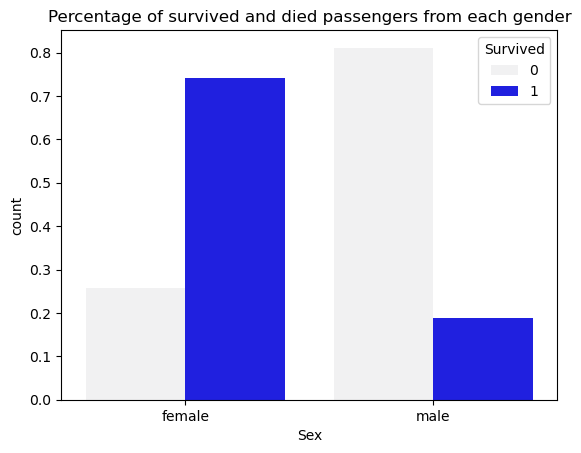

In [4]:
stat=df.groupby('Sex')['Survived']
stat1 = stat.value_counts(normalize=False).reset_index(name='count')
print(stat1)
print('------------------------------------')
stat2 = stat.value_counts(normalize=True).reset_index(name='count')
sns.barplot(x='Sex', y='count', hue='Survived', data=stat2,color='blue')
plt.title('Percentage of survived and died passengers from each gender')
plt.show()

# Total number of survived and died passengers from each gender:
## -males survived=109
## -males died=468
## -females survived=233
## -females died= 81
# percentage of males survived from all males =18.9 %
# percentage of females survived from all females =74.2 %

   Pclass  Survived  count
0       1         1    136
1       1         0     80
2       2         0     97
3       2         1     87
4       3         0    372
5       3         1    119
------------------------------------


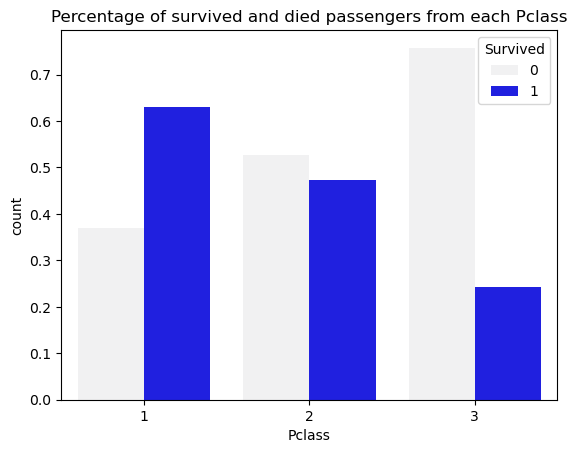

In [5]:
stat3=df.groupby('Pclass')['Survived']
stat4 = stat3.value_counts(normalize=False).reset_index(name='count')
print(stat4)
print('------------------------------------')
stat5 = stat3.value_counts(normalize=True).reset_index(name='count')
sns.barplot(x='Pclass', y='count', hue='Survived', data=stat5,color='blue')
plt.title('Percentage of survived and died passengers from each Pclass')
plt.show()

# Total number of survived and died passengers from each Pclass:
## -Pclass(1):  survived=136 , died=80
## -Pclass(2): survived=87 ,  died=97
## -Pclass(3): survived=119 ,  died=372
# percentage of first class survived passengers from all first class passengers =62.9 %
# percentage of second class survived passengers from all second class passengers =47.3 %
# percentage of third class survived passengers from all third class passengers =24.2 %


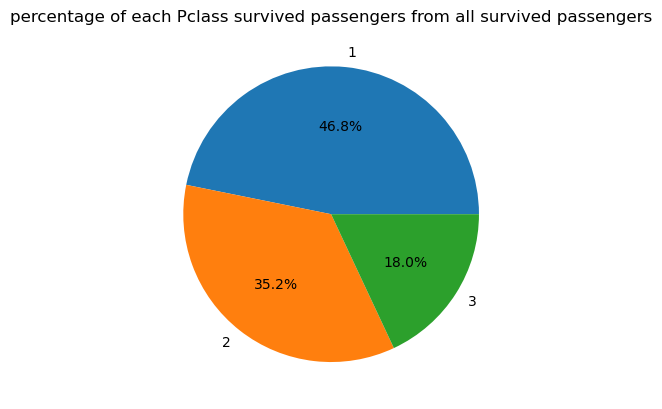

In [6]:
stat6 = stat3.value_counts(normalize=True).reset_index(name='percentage')
stat6=stat6[stat6['Survived']==1]
plt.pie(stat6['percentage'],labels=stat6['Pclass'], autopct='%1.1f%%')
plt.title('percentage of each Pclass survived passengers from all survived passengers')
plt.show()

  Embarked  Survived  count
0        C         1     93
1        C         0     75
2        Q         0     47
3        Q         1     30
4        S         0    427
5        S         1    219
----------------------------------


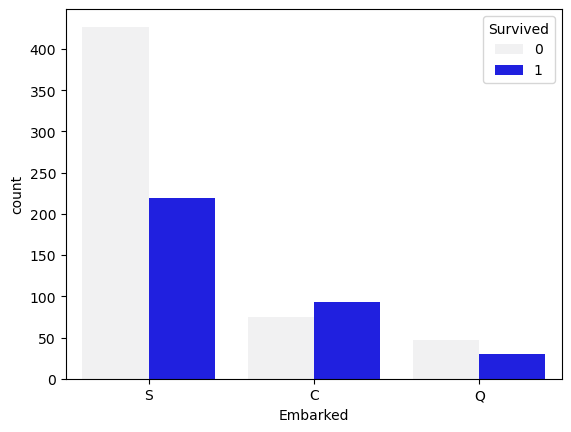

In [7]:
stat7=df.groupby('Embarked')['Survived']
stat8 = stat7.value_counts(normalize=False).reset_index(name='count')
print(stat8)
print('----------------------------------')
sns.countplot(data= df , x=df['Embarked'] , hue=df[ 'Survived'],color='blue')
plt.show()

# Total number of survived and died passengers from each Embarked port
## Embarked(C): survived=93 , died=75
## Embarked(Q): survived=30 , died=47
## Embarked(S): survived=219 , died=427

# Encoding

In [8]:
print(df['Sex'].unique())
print('transformed to')
df['Sex'] = [1 if i == 'female' else 0 for i in df['Sex']]
print(df['Sex'].unique())
print('----------------------------------')
print(df['Embarked'].unique())
print('transformed to')
df['Embarked'] = [2 if i == 'S' else 1 if i == 'C' else 0 for i in df['Embarked']]
print(df['Embarked'].unique())
print('----------------------------------')
print(df.head())

['male' 'female']
transformed to
[0 1]
----------------------------------
['S' 'C' 'Q']
transformed to
[2 1 0]
----------------------------------
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         2
1         1       1    1  38.0      1      0  71.2833         1
2         1       3    1  26.0      0      0   7.9250         2
3         1       1    1  35.0      1      0  53.1000         2
4         0       3    0  35.0      0      0   8.0500         2


# check correlation

<Axes: >

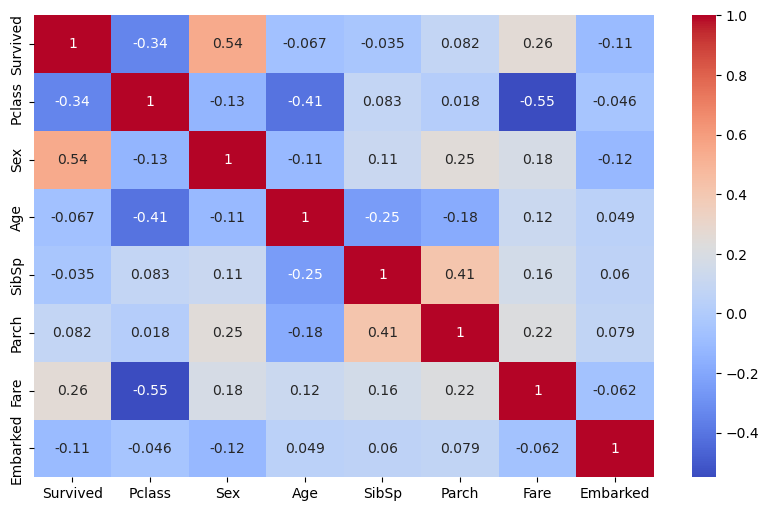

In [9]:
df.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

# correlation Conclusion:
## -From all the above, we can conclude that females had greater chances of survival, in addition to being young in age, which gives you greater chances as well. Also, the chances of survival for passengers on the first Pclass were higher than others on the second and third Pclasses, and this was also affected by the fare while the results were not greatly affected by the embarked or whether the passenger is accompanied by his family or not.
## -we need some engineering features to improve performance like divided ages to age categories and divided fare to fare categories and also combine all family members in one columns describe the status of passenger if he was alone or not.

# Data engineering with visualization

## survival by age histogram

total number of survived children people is 31 out of 44 , 0.7045454545454546%
-----------------------------------


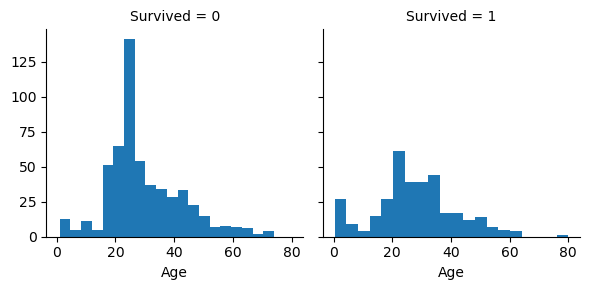

In [10]:

age_sur=df[['Age','Survived']]
young=(age_sur['Age'] < 6).sum()
age_sur_cond = ((age_sur['Age'] < 6) & (age_sur['Survived'] ==1))
print(f'total number of survived children people is {age_sur_cond.sum()} out of {young} , {age_sur_cond.sum()/young}%')
print('-----------------------------------')
g = sns.FacetGrid(df, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)

## creating a new column 'Age_category' which is categorized based on age



[2 3 0 1 4]
------------------------------


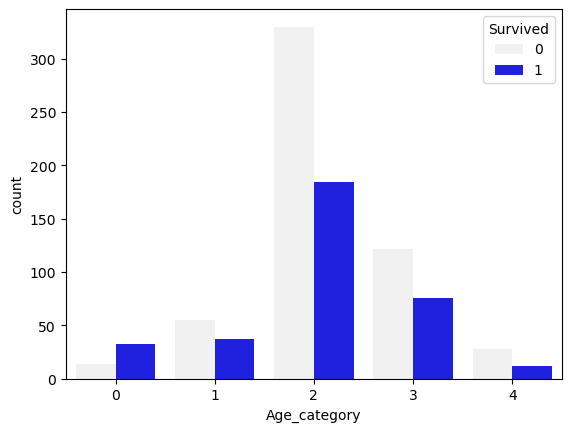

In [11]:
df['Age_category']=pd.cut(df['Age'],bins = [0, 6, 18, 35, 55, 100], labels = ['baby','child', 'Young Adult', 'Middle-Aged Adult', 'Senior'])
df['Age_category'] = [4 if i == 'Senior' else 3 if i =='Middle-Aged Adult' else 2 if i == 'Young Adult' else 1 if i == 'child'else 0 for i in df['Age_category']]
print(df['Age_category'].unique())
print('------------------------------')
sns.countplot(data= df , x=df['Age_category'] , hue=df[ 'Survived'],color='blue')
plt.show()

## creating a new column 'Family' which is the sum of 'SibSp' and 'Parch' coulmns and new column 'family_bool' which represent the passengers are with family or alone

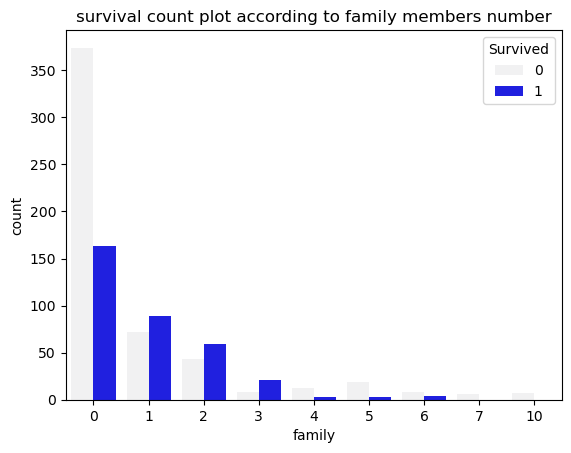

---------------------------


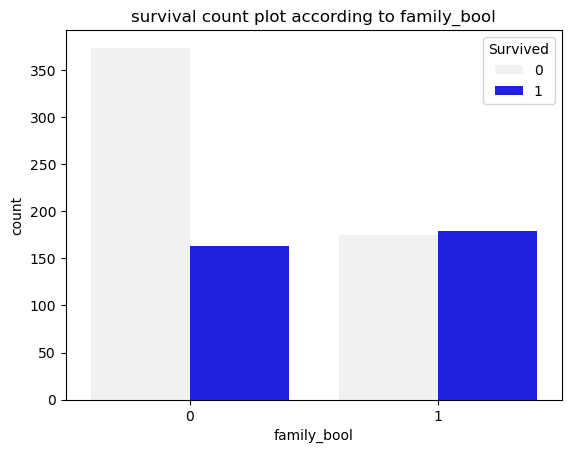

In [12]:
df['family'] = df['SibSp'] + df['Parch']
sns.countplot(data= df , x=df['family'] , hue=df[ 'Survived'],color='blue')
plt.title('survival count plot according to family members number')
plt.show()
print('---------------------------')
df["family_bool"] = np.where(df["family"] > 0, 1, 0)
sns.countplot(data= df , x=df['family_bool'] , hue=df[ 'Survived'],color='blue')
plt.title('survival count plot according to family_bool')
plt.show()


## creating a new column classify passengers fare into three categories

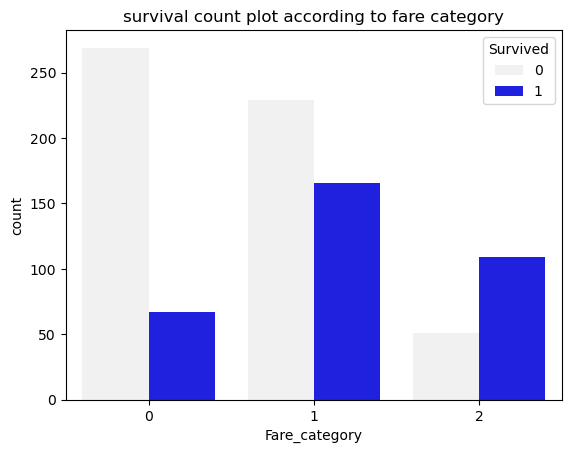

In [13]:
df['Fare_category']=pd.cut(df['Fare'],bins=[0,10,50,1000], labels=['low','medium','high'])
df['Fare_category'] = [2 if i == 'high' else 1 if i == 'medium' else 0 for i in df['Fare_category']]
sns.countplot(data= df , x=df['Fare_category'] , hue=df[ 'Survived'],color='blue')
plt.title('survival count plot according to fare category')
plt.show()

<Axes: >

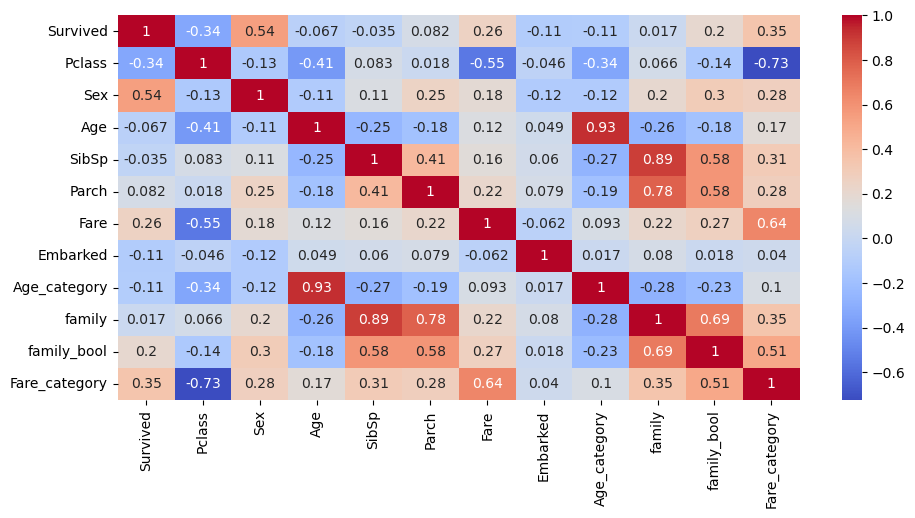

In [14]:
df.corr()
fig, ax = plt.subplots(figsize=(11, 5))
sns.heatmap(df.corr(),annot=True , cmap='coolwarm')

## split data

In [15]:
x= df.drop(['Survived'], axis= 1)
y= df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.1,random_state=42)

## scaling data

In [16]:
scaler=RobustScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

# feature selection 

In [17]:
param_grid_1= {'n_features_to_select': [1,2,3,4,5,6,7,8,9,10,11],'estimator__max_depth': list(range(3,10)) ,
               'estimator__eta': [0.001,0.01,0.1,1],'estimator__gamma': [0,.01,.1,1,5,10]}
xg=xgb.XGBClassifier(objective="binary:logistic", random_state=42)
wrapper = RFE(estimator=xg)
grid_search_1= GridSearchCV(estimator=wrapper, param_grid=param_grid_1, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_1.fit(x_train, y_train)
print("Best hyperparameters:", grid_search_1.best_params_)

Best hyperparameters: {'estimator__eta': 0.1, 'estimator__gamma': 0.1, 'estimator__max_depth': 5, 'n_features_to_select': 7}


In [18]:
xg=xgb.XGBClassifier(objective="binary:logistic",random_state=42, max_depth= 5 , eta=0.1 , gamma= 0.1)
wrapper=RFE(xg,n_features_to_select=7)
wrapper.fit(x_train,y_train)

x_train_s=wrapper.transform(x_train)
x_val_s=wrapper.transform(x_val)
x_test_s=wrapper.transform(x_test)
mask = wrapper.get_support()
print(mask)
print('-------------------------------------------------------')
x_train_s=pd.DataFrame(x_train_s)
x_val_s=pd.DataFrame(x_val_s)
x_test_s=pd.DataFrame(x_test_s)
print(x_train_s)

[ True  True  True  True False  True  True False  True False False]
-------------------------------------------------------
       0    1         2    3         4    5    6
0   -2.0  0.0 -1.812898  1.0  5.870272  0.0  3.0
1   -1.0  0.0  0.859383  0.0 -0.063347  0.0  0.0
2   -2.0  1.0  0.551437  1.0  1.601000  0.0  1.0
3    0.0  0.0  0.438330  0.0 -0.249463  0.0  0.0
4    0.0  1.0 -0.351143  1.0  0.043719 -2.0  1.0
..   ...  ...       ...  ...       ...  ...  ...
715 -2.0  0.0  1.019480  0.0  0.516953  0.0  0.0
716 -2.0  1.0  0.789207  0.0  9.124019 -1.0  0.0
717  0.0  1.0 -0.473950  1.0 -0.199321  0.0  1.0
718 -1.0  0.0  1.631313  0.0 -0.063347  0.0  0.0
719  0.0  0.0 -0.684477  1.0 -0.317985  0.0  1.0

[720 rows x 7 columns]


# fit some models on selected data in these steps:
### 1- grid search to find best hyperparameters for models
### 2- fit model with best hyperparameters and check overfitting
### 3- model prediction and scores


## A) random forest classifier

In [19]:
param_grid_RF= {'max_depth': list(range(3,10)) ,'n_estimators': [50,100,200,400,500], 'criterion':['gini', 'entropy', 'log_loss']}
model_RF = RandomForestClassifier(bootstrap=True ,random_state=42)
grid_search_RF = GridSearchCV(estimator=model_RF,param_grid=param_grid_RF,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_RF.fit(x_train_s, y_train)
print("Best hyperparameters:", grid_search_RF.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 50}


In [20]:
RF_model=RandomForestClassifier(bootstrap=True ,random_state=42,n_estimators= 50 , criterion='gini' , max_depth= 7)
RF_model.fit(x_train_s,y_train)
y_pred_RF_train=RF_model.predict(x_train_s)
y_pred_RF_val=RF_model.predict(x_val_s)
accuracy_RF_train=accuracy_score(y_train,y_pred_RF_train)
accuracy_RF_val=accuracy_score(y_val,y_pred_RF_val)
print(f'train accuracy={accuracy_RF_train * 100} %')
print('----------------------------------')
print(f'val accuracy={accuracy_RF_val* 100} %')

train accuracy=89.30555555555556 %
----------------------------------
val accuracy=87.65432098765432 %


In [21]:
y_pred_RF=RF_model.predict(x_test_s)
accuracy_RF=accuracy_score(y_test,y_pred_RF)
recall_RF=recall_score(y_test,y_pred_RF)
precesion_RF=precision_score(y_test,y_pred_RF)
f1_Score_RF=f1_score(y_test,y_pred_RF)
print(f'scores for random forest model for selected feature data')
print(f'accuracy={accuracy_RF * 100} %')
print(f'recall= {recall_RF * 100} %')
print(f'precision = {precesion_RF * 100} %')
print(f'f1_score= {f1_Score_RF * 100} %')

scores for random forest model for selected feature data
accuracy=86.66666666666667 %
recall= 80.55555555555556 %
precision = 85.29411764705883 %
f1_score= 82.85714285714286 %


## B) support vector machine classifier

In [22]:
param_grid_svm= {'C': [0.001 , 0.01,0.1, 1, 10 , 100],'kernel': ['linear','poly', 'rbf'] , 'degree' : [1,2,3,4,5,6,7]}
model_svm = SVC(random_state=42 , probability=True)
grid_search_svm = GridSearchCV(estimator=model_svm,param_grid=param_grid_svm,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_svm.fit(x_train_s, y_train)
print("Best hyperparameters:", grid_search_svm.best_params_)

Best hyperparameters: {'C': 10, 'degree': 2, 'kernel': 'poly'}


In [23]:
svm_model=SVC(random_state=42,kernel='poly',C= 10 , degree=2)
svm_model.fit(x_train_s,y_train)
y_pred_svm_train=svm_model.predict(x_train_s)
y_pred_svm_val=svm_model.predict(x_val_s)
accuracy_svm_train=accuracy_score(y_train,y_pred_svm_train)
accuracy_svm_val=accuracy_score(y_val,y_pred_svm_val)
print(f'train accuracy ={accuracy_svm_train * 100} %')
print('----------------------------------------')
print(f'val accuracy ={accuracy_svm_val * 100} %')

train accuracy =83.33333333333334 %
----------------------------------------
val accuracy =82.71604938271605 %


In [24]:
y_pred_svm=svm_model.predict(x_test_s)
accuracy_svm=accuracy_score(y_test,y_pred_svm)
recall_svm=recall_score(y_test,y_pred_svm)
precesion_svm=precision_score(y_test,y_pred_svm)
f1_Score_svm=f1_score(y_test,y_pred_svm)
print(f'scores for svm')
print(f'accuracy ={accuracy_svm * 100} %')
print(f'recall = {recall_svm * 100} %')
print(f'precision = {precesion_svm * 100} %')
print(f'f1_score= {f1_Score_svm * 100} %')

scores for svm
accuracy =85.55555555555556 %
recall = 75.0 %
precision = 87.09677419354838 %
f1_score= 80.59701492537312 %


## C) XG boosting

In [25]:
param_grid_xg= {'eta': [0.001,0.01,0.1,0.2,0.4,0.6,0.8,1],'gamma': [0,.1,.5,1,5,10,20,50,100] , 'max_depth':list(range(3,10))}
model_xg = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
grid_search_xg = GridSearchCV(estimator=model_xg,param_grid=param_grid_xg,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_xg.fit(x_train_s, y_train)
print("Best hyperparameters:", grid_search_xg.best_params_)

Best hyperparameters: {'eta': 0.1, 'gamma': 1, 'max_depth': 5}


In [26]:
xg_model=xgb.XGBClassifier(objective="binary:logistic",gamma=1, random_state=42,max_depth= 5 , eta=0.1 )
xg_model.fit(x_train_s,y_train)
y_pred_xg_train=xg_model.predict(x_train_s)
y_pred_xg_val=xg_model.predict(x_val_s)
accuracy_xg_train=accuracy_score(y_train,y_pred_xg_train)
accuracy_xg_val=accuracy_score(y_val,y_pred_xg_val)
print(f'train accuracy ={accuracy_xg_train * 100} %')
print('----------------------------------------')
print(f'val accuracy ={accuracy_xg_val * 100} %')


train accuracy =88.88888888888889 %
----------------------------------------
val accuracy =79.01234567901234 %


In [27]:
y_pred_xg=xg_model.predict(x_test_s)
accuracy_xg=accuracy_score(y_test,y_pred_xg)
recall_xg=recall_score(y_test,y_pred_xg)
precesion_xg=precision_score(y_test,y_pred_xg)
f1_Score_xg=f1_score(y_test,y_pred_xg)
print(f'scores for xg')
print(f'accuracy ={accuracy_xg * 100} %')
print(f'recall = {recall_xg * 100} %')
print(f'precision = {precesion_xg* 100} %')
print(f'f1_score= {f1_Score_xg * 100} %')

scores for xg
accuracy =84.44444444444444 %
recall = 83.33333333333334 %
precision = 78.94736842105263 %
f1_score= 81.08108108108108 %


## D) gradient boosting

In [28]:
param_grid_gb= {'n_estimators': [50,100,200,300,400,500,600 ,1000],'learning_rate': [0, 0.001,0.005,.01, 0.05,.1,.5,1,3,5,10] , 'max_depth':list(range(3,15))}
model_gb = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(estimator=model_gb,param_grid=param_grid_gb,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_gb.fit(x_train_s, y_train)
print("Best hyperparameters:", grid_search_gb.best_params_)

Best hyperparameters: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 500}


In [29]:
gb_model=GradientBoostingClassifier(random_state=42 ,n_estimators= 500 , learning_rate= .005 , max_depth= 5)
gb_model.fit(x_train_s,y_train)
y_pred_gb_train=gb_model.predict(x_train_s)
y_pred_gb_val=gb_model.predict(x_val_s)
accuracy_gb_train=accuracy_score(y_train,y_pred_gb_train)
accuracy_gb_val=accuracy_score(y_val,y_pred_gb_val)
print(f'train accuracy ={accuracy_gb_train * 100} %')
print('----------------------------------------')
print(f'val accuracy ={accuracy_gb_val * 100} %')

train accuracy =90.55555555555556 %
----------------------------------------
val accuracy =80.24691358024691 %


In [30]:
y_pred_gb=gb_model.predict(x_test_s)
accuracy_gb=accuracy_score(y_test,y_pred_gb)
recall_gb=recall_score(y_test,y_pred_gb)
precesion_gb=precision_score(y_test,y_pred_gb)
f1_Score_gb=f1_score(y_test,y_pred_gb)
print(f'scores for gradient boosting')
print(f'accuracy ={accuracy_gb * 100} %')
print(f'recall = {recall_gb * 100} %')
print(f'precision = {precesion_gb* 100} %')
print(f'f1_score= {f1_Score_gb * 100} %')

scores for gradient boosting
accuracy =84.44444444444444 %
recall = 77.77777777777779 %
precision = 82.35294117647058 %
f1_score= 80.0 %


## E) logistic regression

In [31]:
param_grid_LR= {'C' : [.001, .01, .1 , 1, 10] }
model_LR = LogisticRegression(random_state=42 , penalty ='l2')
grid_search_LR = GridSearchCV(estimator=model_LR,param_grid=param_grid_LR,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_LR.fit(x_train_s, y_train)
print("Best hyperparameters:", grid_search_LR.best_params_)

Best hyperparameters: {'C': 0.1}


In [32]:
LR_model=LogisticRegression(random_state=42 , penalty ='l2', C=0.1 )
LR_model.fit(x_train_s,y_train)
y_pred_LR_train=LR_model.predict(x_train_s)
y_pred_LR_val=LR_model.predict(x_val_s)
accuracy_LR_train=accuracy_score(y_train,y_pred_LR_train)
accuracy_LR_val=accuracy_score(y_val,y_pred_LR_val)
print(f' train accuracy={accuracy_LR_train * 100} %')
print('----------------------------------------')
print(f' val accuracy={accuracy_LR_val * 100} %')

 train accuracy=80.69444444444444 %
----------------------------------------
 val accuracy=80.24691358024691 %


In [33]:
y_pred_LR=LR_model.predict(x_test_s)
accuracy_LR=accuracy_score(y_test,y_pred_LR)
recall_LR=recall_score(y_test,y_pred_LR)
precesion_LR=precision_score(y_test,y_pred_LR)
f1_Score_LR=f1_score(y_test,y_pred_LR)
print(f'scores for logistic regression model')
print(f'accuracy={accuracy_LR * 100} %')
print(f'recall= {recall_LR * 100} %')
print(f'precision = {precesion_LR * 100} %')
print(f'f1_score= {f1_Score_LR * 100} %')

scores for logistic regression model
accuracy=88.88888888888889 %
recall= 86.11111111111111 %
precision = 86.11111111111111 %
f1_score= 86.11111111111111 %


# voting between models

In [34]:
hard_voting = VotingClassifier(estimators=[('rf',RF_model),('gb', gb_model) ,('lr',LR_model ) ,('xg',xg_model ) ,  ('svm',svm_model )], voting='hard')
hard_voting.fit(x_train_s, y_train)
y_pred_hv_train=hard_voting.predict(x_train_s)
y_pred_hv_val=hard_voting.predict(x_val_s)
accuracy_hv_train=accuracy_score(y_train,y_pred_hv_train)
accuracy_hv_val=accuracy_score(y_val,y_pred_hv_val)
print(f' train accuracy={accuracy_hv_train * 100} %')
print('----------------------------------------')
print(f' val accuracy={accuracy_hv_val * 100} %')

 train accuracy=88.33333333333333 %
----------------------------------------
 val accuracy=86.41975308641975 %


In [35]:
y_pred_hv=hard_voting.predict(x_test_s)
accuracy_hv=accuracy_score(y_test,y_pred_hv)
recall_hv=recall_score(y_test,y_pred_hv)
precesion_hv=precision_score(y_test,y_pred_hv)
f1_Score_hv=f1_score(y_test,y_pred_hv)
print(f'scores for hard voting model')
print(f'accuracy={accuracy_hv * 100} %')
print(f'recall= {recall_hv * 100} %')
print(f'precision = {precesion_hv * 100} %')
print(f'f1_score= {f1_Score_hv * 100} %')

scores for hard voting model
accuracy=87.77777777777777 %
recall= 83.33333333333334 %
precision = 85.71428571428571 %
f1_score= 84.50704225352112 %


# models comparison

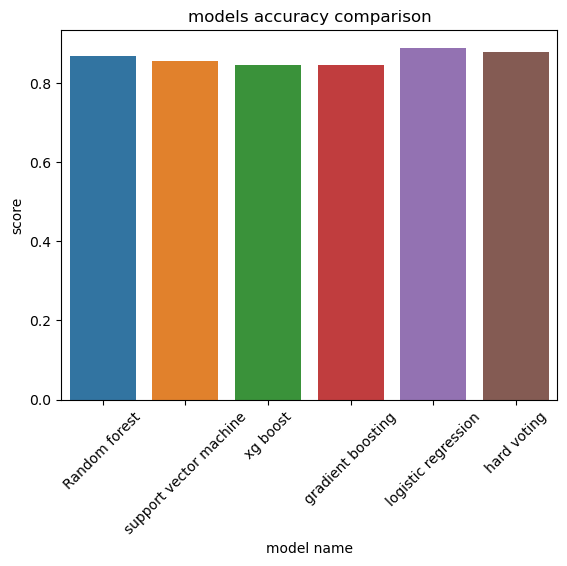

In [36]:
models_names=['Random forest','support vector machine','xg boost','gradient boosting','logistic regression', 'hard voting']
model_accuracies=[accuracy_RF,accuracy_svm ,accuracy_xg ,accuracy_gb ,accuracy_LR , accuracy_hv ]
sns.barplot(x=models_names, y=model_accuracies)
plt.xlabel('model name')
plt.ylabel('score')
plt.title('models accuracy comparison')
plt.xticks(rotation=45)
plt.show()

# kaggle submitions

In [37]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
passID_test=test_data.PassengerId  
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0],inplace=True)
test_data['Age'].fillna(test_data.groupby(['Pclass','Sex'])
['Age'].transform('mean'),inplace=True)

test_data['Sex'] = [1 if i == 'female' else 0 for i in test_data['Sex']]
test_data['Embarked'] = [2 if i == 'S' else 1 if i == 'C' else 0 for i in test_data['Embarked']]
test_data['Age_category']=pd.cut(test_data['Age'],bins = [0, 6, 18, 35, 55, 100], labels = ['baby','child', 'Young Adult', 'Middle-Aged Adult', 'Senior'])
test_data['Age_category'] = [4 if i == 'Senior' else 3 if i =='Middle-Aged Adult' else 2 if i == 'Young Adult' else 1 if i == 'child'else 0 for i in test_data['Age_category']]
test_data['family'] = test_data['SibSp'] + test_data['Parch']
test_data["family_bool"] = np.where(test_data["family"] > 0, 1, 0)
test_data['Fare_category']=pd.cut(test_data['Fare'],bins=[0,10,50,1000], labels=['low','medium','high'])
test_data['Fare_category'] = [2 if i == 'high' else 1 if i == 'medium' else 0 for i in test_data['Fare_category']]
print(test_data.head())
print('------------------------------------------')
print(test_data.info())
print('------------------------------------------')
print(test_data[test_data['Fare'].isna()].index) 
print(test_data.iloc[152])
test_data['Fare'].fillna(8 ,inplace=True) #according to other features of passenger
      
test_s=pd.DataFrame(test_data)[['Pclass', 'Sex', 'Age','SibSp', 'Fare','Embarked','family' ]]  
test_s=scaler.fit_transform(test_s)


   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

    Age  SibSp  Parch   Ticket     Fare Cabin  Embarked  Age_category  family  \
0  34.5      0      0   330911   7.8292   NaN         0             2       0   
1  47.0      1      0   363272   7.0000   NaN         2             3       1   
2  62.0      0      0   240276   9.6875   NaN         0             4       0   
3  27.0      0      0   315154   8.6625   NaN         2             2       0   
4  22.0      1      1  3101298  12.2875   NaN         2             2       2   

   family_bool  Fare_category  
0            0    

# kaggle scores for model

In [38]:
# Random forest
#y_test_RF=RF_model.predict(test_s)
#subDF=pd.DataFrame({'PassengerId':passID_test, 'Survived':y_test_RF})
#subDF.to_csv("submission.csv", index=False)
# kaggle score=.78708

In [39]:
# SVM
#y_test_svm=svm_model.predict(test_s)
#subDF=pd.DataFrame({'PassengerId':passID_test, 'Survived':y_test_svm})
#subDF.to_csv("submission.csv", index=False)
# kaggle score=.75119

In [40]:
# XG boost
#y_test_xg=xg_model.predict(test_s)
#subDF=pd.DataFrame({'PassengerId':passID_test, 'Survived':y_test_xg})
#subDF.to_csv("submission.csv", index=False)
# kaggle score=.74641

In [41]:
# gradient boosting
#y_test_gb=gb_model.predict(test_s)
#subDF=pd.DataFrame({'PassengerId':passID_test, 'Survived':y_test_gb})
#subDF.to_csv("submission.csv", index=False)
# kaggle score=.78947

In [42]:
# logistic regression
#y_test_LR=LR_model.predict(test_s)
#subDF=pd.DataFrame({'PassengerId':passID_test, 'Survived':y_test_LR})
#subDF.to_csv("submission.csv", index=False)
# kaggle score=.76315

In [43]:
# hard_voting
#y_test_hv=hard_voting .predict(test_s)
#subDF=pd.DataFrame({'PassengerId':passID_test, 'Survived':y_test_hv})
#subDF.to_csv("submission.csv", index=False)
# kaggle score = .77751

# kaggle scores comparison

In [44]:
models_names=['Random forest','support vector machine','xg boost','gradient boosting','logistic regression', 'hard voting']
models_kag_scores=[.78708 ,.75119 ,.74641, .78947 , .76315  ,.77751]

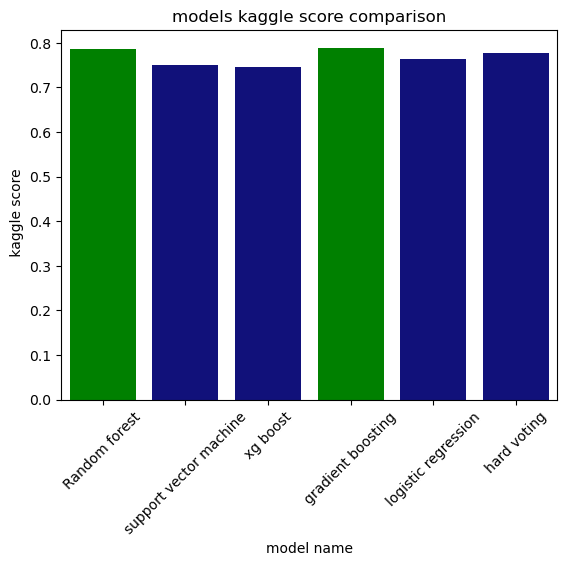

In [45]:
bar=sns.barplot(x=models_names, y=models_kag_scores, color='darkblue')
bar.patches[3].set_facecolor('green')
bar.patches[0].set_facecolor('green')
plt.xlabel('model name')
plt.ylabel(' kaggle score')
plt.title('models kaggle score comparison')
plt.xticks(rotation=45)
plt.show()

# -The best model that dealt with the data accurately is the gradient boosting model , but with a slight difference from the random forest model.
# -the voting model which depends on apply more than one model then make voting between them achieved a good results also.
# -while the logistic regression model  was a little far away although it was giving good results with the already existing data (train,val,test) But it seems that were a deceptive results, and the same was true for the support vector machine model and xg boosting model.

# shall we make a final soft voting between most two models were well performed with data ( gradient boosting and random forest)

In [46]:
final_soft_voting = VotingClassifier(estimators=[('rf',RF_model),('gb', gb_model) ], voting='soft' ,)
final_soft_voting.fit(x_train_s, y_train)
y_pred_sv_train=final_soft_voting.predict(x_train_s)
y_pred_sv_val=final_soft_voting.predict(x_val_s)
accuracy_sv_train=accuracy_score(y_train,y_pred_sv_train)
accuracy_sv_val=accuracy_score(y_val,y_pred_sv_val)
print(f' train accuracy={accuracy_sv_train * 100} %')
print(f' val accuracy={accuracy_sv_val * 100} %')

 train accuracy=90.55555555555556 %
 val accuracy=82.71604938271605 %


In [47]:
y_pred_sv=final_soft_voting.predict(x_test_s)
accuracy_sv=accuracy_score(y_test,y_pred_sv)
recall_sv=recall_score(y_test,y_pred_sv)
precesion_sv=precision_score(y_test,y_pred_sv)
f1_Score_sv=f1_score(y_test,y_pred_sv)
print(f'scores for soft voting model')
print(f'accuracy={accuracy_sv * 100} %')
print(f'recall= {recall_sv * 100} %')
print(f'precision = {precesion_sv * 100} %')
print(f'f1_score= {f1_Score_sv * 100} %')

scores for soft voting model
accuracy=85.55555555555556 %
recall= 77.77777777777779 %
precision = 84.84848484848484 %
f1_score= 81.15942028985506 %


In [48]:
#final_soft_voting
y_test_sv=final_soft_voting.predict(test_s)
subDF=pd.DataFrame({'PassengerId':passID_test, 'Survived':y_test_sv})
subDF.to_csv("submission.csv", index=False)
# kaggle score = .79425

# kaggle scores for all models in descending order

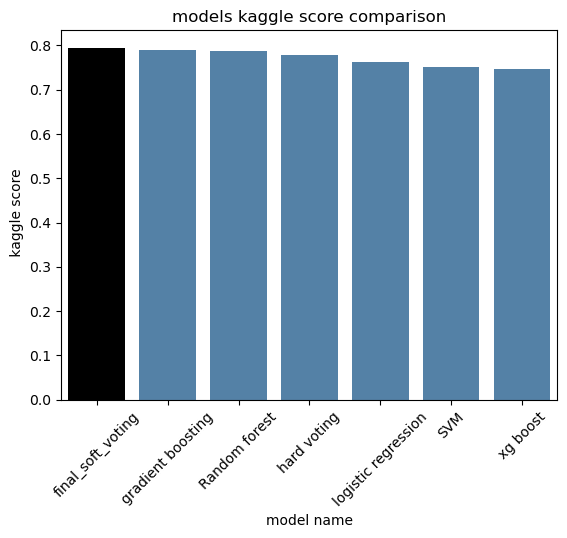

In [49]:
models_names=['final_soft_voting','gradient boosting','Random forest','hard voting','logistic regression','SVM','xg boost']
models_kag_scores=[ .79425,.78947 , .78708 ,.77751 , .76315 , .75119 ,.74641  ]
a=sns.barplot(x=models_names, y=models_kag_scores ,color='steelblue')
a.patches[0].set_facecolor('black')
plt.xlabel('model name')
plt.ylabel(' kaggle score')
plt.title('models kaggle score comparison')
plt.xticks(rotation=45)
plt.show()